### 1. Import thư viện và đọc dữ liệu

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import seaborn as sns

In [ ]:
df=pd.read_csv("dataset\METABRIC_RNA_Mutation.csv")

/tmp/ipykernel_13/3300849779.py:1: DtypeWarning: Columns (678,688,690,692) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("/kaggle/input/breast-cancer-gene-expression-profiles-metabric/METABRIC_RNA_Mutation.csv")


In [3]:
df

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,7295,43.10,BREAST CONSERVING,Breast Cancer,Breast Invasive Lobular Carcinoma,High,0,LumA,4.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1900,7296,42.88,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumB,4.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1901,7297,62.90,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumB,4.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1902,7298,61.16,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,0,LumB,4.0,Positve,...,0,0,0,0,0,0,0,0,0,0


### 2. Kiểm tra giá trị thiếu
##### - Mỗi cột trong bảng dữ liệu có thể có ô trống (missing value).
##### - Ví dụ: bảng thông tin bệnh nhân, có người chưa đo được HER2, ô đó để trống.
##### - df.isna().sum() đếm xem mỗi cột có bao nhiêu ô trống.
##### - Nếu nhiều ô trống, ta cần lấp đầy hoặc loại bỏ trước khi dùng cho machine learning.
##### -> Tóm tắt: kiểm tra xem cái danh sách bệnh nhân có chỗ nào thiếu thông tin không.


In [4]:
na_counts = df.isna().sum()
na_counts = na_counts[na_counts > 0]  

print(na_counts)

type_of_breast_surgery             22
cancer_type_detailed               15
cellularity                        54
er_status_measured_by_ihc          30
neoplasm_histologic_grade          72
tumor_other_histologic_subtype     15
primary_tumor_laterality          106
mutation_count                     45
oncotree_code                      15
3-gene_classifier_subtype         204
tumor_size                         20
tumor_stage                       501
death_from_cancer                   1
dtype: int64


### 3. Khám phá dữ liệu categorical (dạng chữ)

##### - Một số cột là dạng “category” (chữ, không phải số).
##### - Ví dụ her2_status có “Positive” hoặc “Negative”.
##### - .unique() cho biết trong cột này có bao nhiêu loại khác nhau.
##### - Giúp ta biết cách chuyển chữ thành số sau này (vì máy tính không hiểu chữ).

In [5]:
df["er_status_measured_by_ihc"].unique()

array(['Positve', 'Negative', nan], dtype=object)

In [6]:
df["her2_status_measured_by_snp6"].unique()

array(['NEUTRAL', 'LOSS', 'GAIN', 'UNDEF'], dtype=object)

In [7]:
df["her2_status"].unique()

array(['Negative', 'Positive'], dtype=object)

##### - Vẽ biểu đồ tần suất các giá trị của tumor_stage

In [8]:
df["tumor_stage"]

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


0       2.0
1       1.0
2       2.0
3       2.0
4       2.0
       ... 
1899    NaN
1900    NaN
1901    NaN
1902    NaN
1903    NaN
Name: tumor_stage, Length: 1904, dtype: float64

<Axes: xlabel='tumor_stage', ylabel='count'>

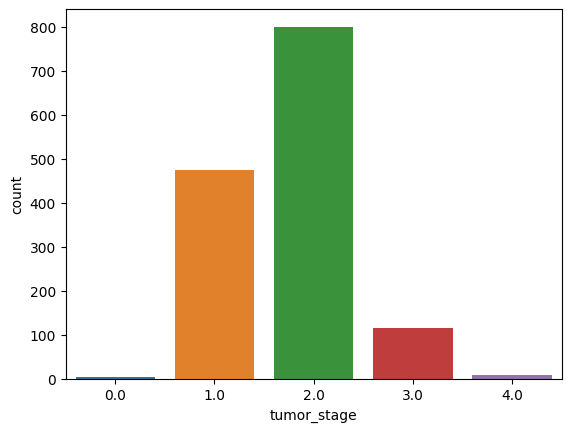

In [9]:
sns.countplot(df,x="tumor_stage")

### 4. Lựa chọn các feature quan trọng

##### - Trong bảng gốc có quá nhiều cột (cả gene expression + thông tin bệnh nhân).
##### - Chúng ta chỉ lấy những cột thật sự cần thiết để dự đoán.
##### - Giúp giảm phức tạp, dễ xử lý hơn

In [10]:
KEEP=["type_of_breast_surgery",
      "cancer_type",
      "cancer_type_detailed",
      "cellularity",
      "chemotherapy",
      "pam50_+_claudin-low_subtype",
      "neoplasm_histologic_grade",
      "her2_status",
      "hormone_therapy",
      'lymph_nodes_examined_positive',
      "nottingham_prognostic_index",
      "pr_status",
      "radio_therapy",
      "overall_survival"
     ]


In [11]:
Categorical=["type_of_breast_surgery",
      "cancer_type",
      "cancer_type_detailed",
      "cellularity",
      "chemotherapy",
      "pam50_+_claudin-low_subtype",
      "neoplasm_histologic_grade",
      "her2_status",
      "hormone_therapy",
      "pr_status",
      "radio_therapy"
     ]

In [12]:
df_features=df[KEEP]

In [13]:
na_counts = df_features.isna().sum()
na_counts = na_counts[na_counts > 0]  

print(na_counts)

type_of_breast_surgery       22
cancer_type_detailed         15
cellularity                  54
neoplasm_histologic_grade    72
dtype: int64


### 5. Trực quan hóa phân phối các biến categorical

##### - Vẽ biểu đồ cột cho biết mỗi loại trong cột xuất hiện bao nhiêu lần.
##### - Ví dụ, có 50 bệnh nhân giai đoạn 1, 30 bệnh nhân giai đoạn 2.
##### - Giúp ta nhìn tổng quát dữ liệu và phát hiện nếu dữ liệu bị lệch.

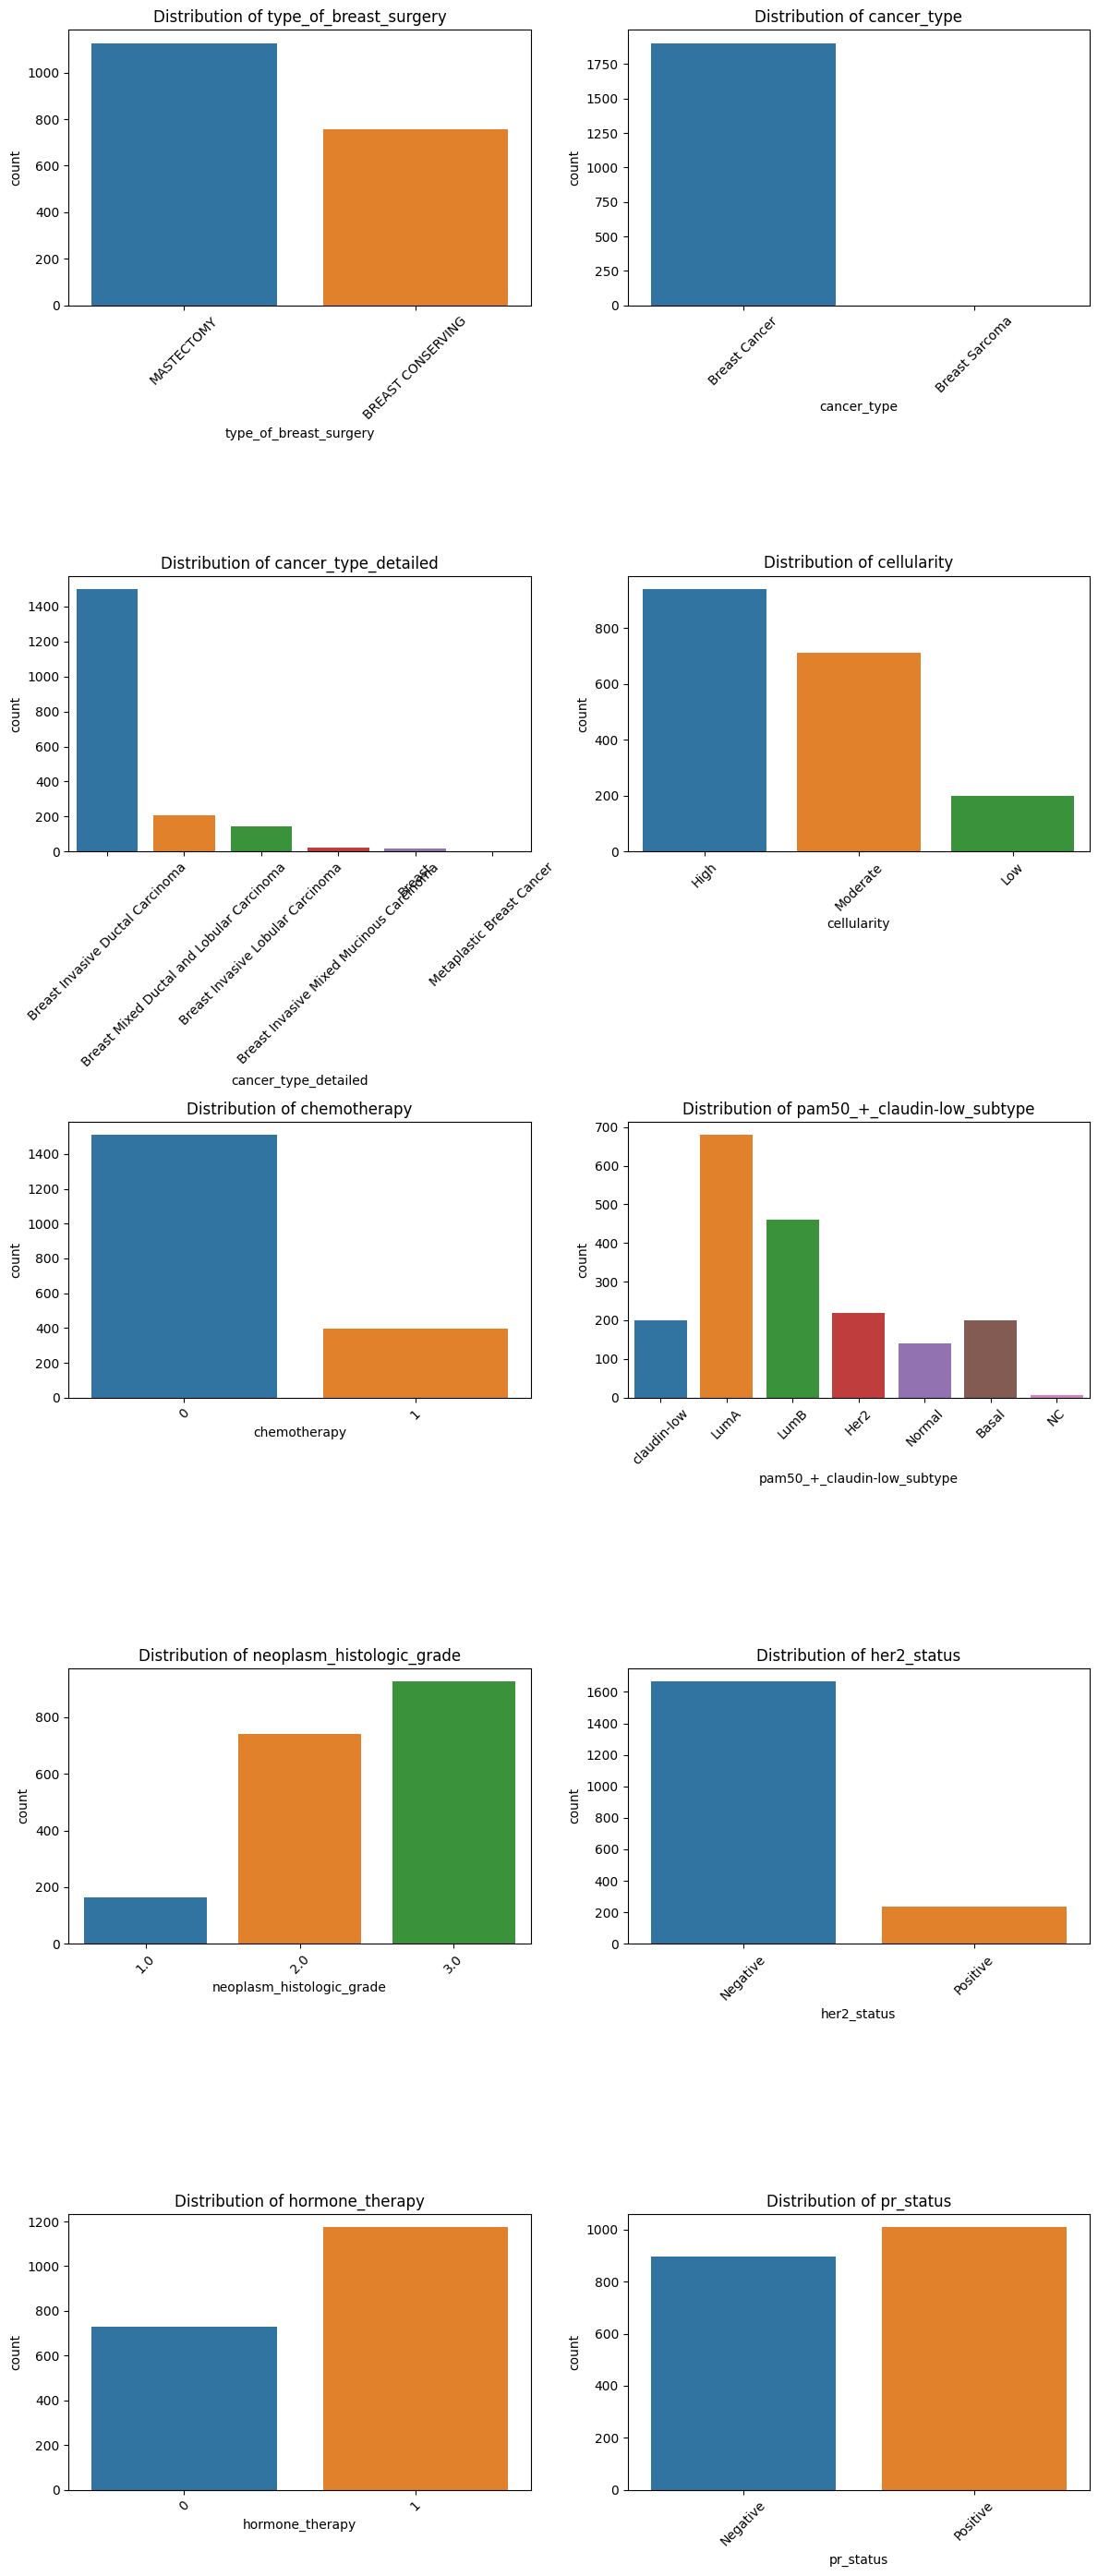

In [14]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=len(Categorical)//2, ncols=2, figsize=(12, 2*len(KEEP)))
axes=axes.flatten()
for col,ax in zip(Categorical,axes):
  
    sns.countplot(data=df, x=col,ax=ax)
    ax.set_title(f"Distribution of {col}")
    ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()
   

### 6. Điền giá trị thiếu cho categorical

##### - Một số ô categorical vẫn còn trống (missing).
##### - Cách làm: lấy ngẫu nhiên một giá trị đã có để điền vào.
##### - Ví dụ: giống như bạn không biết món ăn ưa thích của một người, bạn đoán dựa trên thói quen của những người khác.

In [15]:
def random_impute_categorical(series):
    missing = series.isna()
    if missing.any():
        # sample from existing values
        series.loc[missing] = series[~missing].sample(
            missing.sum(), replace=True, random_state=42
        ).values
    return series

In [16]:
random_impute_categorical(df_features["type_of_breast_surgery"]).isna().sum()

/tmp/ipykernel_13/2673214051.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series.loc[missing] = series[~missing].sample(


0

In [17]:
categorical_missing=["type_of_breast_surgery",
"cancer_type_detailed",
"cellularity",
"neoplasm_histologic_grade"]

In [18]:
for i in categorical_missing:
    df_features[i]=random_impute_categorical(df_features[i])

/tmp/ipykernel_13/2506919460.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features[i]=random_impute_categorical(df_features[i])
/tmp/ipykernel_13/2673214051.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series.loc[missing] = series[~missing].sample(
/tmp/ipykernel_13/2506919460.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

In [19]:
df_features.isna().sum()

type_of_breast_surgery           0
cancer_type                      0
cancer_type_detailed             0
cellularity                      0
chemotherapy                     0
pam50_+_claudin-low_subtype      0
neoplasm_histologic_grade        0
her2_status                      0
hormone_therapy                  0
lymph_nodes_examined_positive    0
nottingham_prognostic_index      0
pr_status                        0
radio_therapy                    0
overall_survival                 0
dtype: int64

In [20]:
df_features

,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,neoplasm_histologic_grade,her2_status,hormone_therapy,lymph_nodes_examined_positive,nottingham_prognostic_index,pr_status,radio_therapy,overall_survival
0,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,claudin-low,3.0,Negative,1,10.0,6.044,Negative,1,1
1,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,3.0,Negative,1,0.0,4.020,Positive,1,1
2,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,2.0,Negative,1,1.0,4.030,Positive,0,0
3,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,2.0,Negative,1,3.0,4.050,Positive,1,1
4,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,3.0,Negative,1,8.0,6.080,Positive,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,BREAST CONSERVING,Breast Cancer,Breast Invasive Lobular Carcinoma,High,0,LumA,3.0,Negative,1,1.0,5.050,Positive,1,1
1900,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumB,3.0,Positive,0,1.0,5.040,Negative,1,0
1901,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumB,3.0,Negative,1,45.0,6.050,Positive,1,0
1902,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,0,LumB,2.0,Negative,1,12.0,5.050,Positive,0,0


In [21]:
df_features["pam50_+_claudin-low_subtype"].unique()

array(['claudin-low', 'LumA', 'LumB', 'Her2', 'Normal', 'Basal', 'NC'],
      dtype=object)

### 7. Encode categorical thành số

##### - Máy học không hiểu chữ (“Positive”, “Negative”).
##### - Chúng ta chuyển chữ thành số:
##### “Negative” → 0
##### “Positive” → 1
##### - Tương tự với các cột khác.

In [22]:
encoding_map = {
    "cellularity": {"Low": 0, "Moderate": 1, "High": 2},
    "type_of_breast_surgery": {'MASTECTOMY':0, 'BREAST CONSERVING':1},
    "cancer_type":{'Breast Cancer':0, 'Breast Sarcoma':1},
    "cancer_type_detailed": {
    "Breast Invasive Ductal Carcinoma": 0,
    "Breast Mixed Ductal and Lobular Carcinoma": 1,
    "Breast Invasive Lobular Carcinoma": 2,
    "Breast Invasive Mixed Mucinous Carcinoma": 3,
    "Breast": 4,
    "Metaplastic Breast Cancer": 5
},
    "pr_status":{
        "Negative":0,
        "Positive":1
    },
    "her2_status":
    {
        "Negative":0,
        "Positive":1
    },
    "pam50_+_claudin-low_subtype":{
        'claudin-low':0, 'LumA':1, 'LumB':2, 'Her2':3, 'Normal':4, 'Basal':5, 'NC':6
    }
}


In [23]:
for col,val in encoding_map.items():
    df_features[col]=df_features[col].replace(val)

/tmp/ipykernel_13/1299326653.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_features[col]=df_features[col].replace(val)
/tmp/ipykernel_13/1299326653.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features[col]=df_features[col].replace(val)


In [24]:
df_features

,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,neoplasm_histologic_grade,her2_status,hormone_therapy,lymph_nodes_examined_positive,nottingham_prognostic_index,pr_status,radio_therapy,overall_survival
0,0,0,0,2,0,0,3.0,0,1,10.0,6.044,0,1,1
1,1,0,0,2,0,1,3.0,0,1,0.0,4.020,1,1,1
2,0,0,0,2,1,2,2.0,0,1,1.0,4.030,1,0,0
3,0,0,1,1,1,2,2.0,0,1,3.0,4.050,1,1,1
4,0,0,1,2,1,2,3.0,0,1,8.0,6.080,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,1,0,2,2,0,1,3.0,0,1,1.0,5.050,1,1,1
1900,0,0,0,2,0,2,3.0,1,0,1.0,5.040,0,1,0
1901,0,0,0,2,0,2,3.0,0,1,45.0,6.050,1,1,0
1902,0,0,0,1,0,2,2.0,0,1,12.0,5.050,1,0,0


In [25]:
df.columns

Index(['patient_id', 'age_at_diagnosis', 'type_of_breast_surgery',
       'cancer_type', 'cancer_type_detailed', 'cellularity', 'chemotherapy',
       'pam50_+_claudin-low_subtype', 'cohort', 'er_status_measured_by_ihc',
       ...
       'mtap_mut', 'ppp2cb_mut', 'smarcd1_mut', 'nras_mut', 'ndfip1_mut',
       'hras_mut', 'prps2_mut', 'smarcb1_mut', 'stmn2_mut', 'siah1_mut'],
      dtype='object', length=693)

### 8. Xử lý dữ liệu gene expression (numerical)

##### - Các cột từ 31 trở đi là dữ liệu số lượng lớn (gene expression).
##### - Mỗi cột = một gene, mỗi hàng = một bệnh nhân.
##### - Đây là dữ liệu rất nhiều chiều, cần xử lý khác với categorical.

In [26]:
df_seq=df.iloc[:,31:]

In [27]:
df_seq.isna().sum().sum()

0

### 9. Loại bỏ cột không phải số trong gene expression

##### - Nếu trong gene expression vẫn còn cột chữ, ta loại bỏ.
##### - Chỉ giữ lại số để dùng cho PCA (giảm số chiều dữ liệu).

In [28]:
deq_cat_list=df_seq.select_dtypes(include=["object", "category"]).columns.tolist()

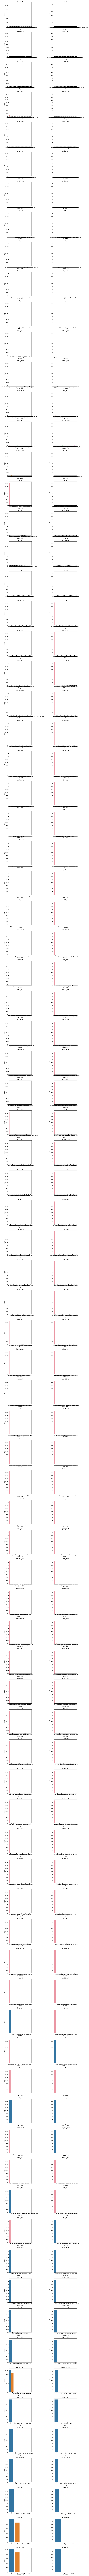

In [29]:
fig,axes=plt.subplots(len(deq_cat_list)//2,2,figsize=(12,2*len(deq_cat_list)))
axes=axes.flatten()

for col,ax in zip(deq_cat_list,axes):
    sns.countplot(df_seq,x=col,ax=ax)
    ax.set_title(col)
plt.tight_layout()
plt.show()


In [30]:
df_seq_cleaned=df_seq.drop(deq_cat_list,axis=1)

In [31]:
df_seq_cleaned.describe()

,brca1,brca2,palb2,pten,tp53,atm,cdh1,chek2,nbn,nf1,...,srd5a1,srd5a2,srd5a3,st7,star,tnk2,tulp4,ugt2b15,ugt2b17,ugt2b7
count,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,1904.000000,1904.000000,1.904000e+03,1904.000000,...,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,1904.000000,1.904000e+03,1.904000e+03,1.904000e+03,1904.000000,1.904000e+03
mean,-6.302521e-07,-4.201681e-07,3.676471e-07,-8.928571e-07,6.302521e-07,-2.100840e-07,0.000002,0.000000,-3.676471e-07,-0.000001,...,4.726891e-07,-3.676471e-07,-9.453782e-07,-1.050420e-07,-0.000002,3.676471e-07,4.726891e-07,7.878151e-07,0.000000,3.731842e-18
std,1.000262e+00,1.000262e+00,1.000263e+00,1.000263e+00,1.000263e+00,1.000262e+00,1.000263,1.000262,1.000263e+00,1.000262,...,1.000263e+00,1.000262e+00,1.000262e+00,1.000263e+00,1.000262,1.000264e+00,1.000262e+00,1.000263e+00,1.000262,1.000262e+00
min,-2.444400e+00,-2.783500e+00,-4.384600e+00,-5.932800e+00,-2.481200e+00,-3.170500e+00,-3.323700,-2.688700,-3.689800e+00,-2.968600,...,-2.120800e+00,-3.364800e+00,-2.719400e+00,-4.982700e+00,-2.981700,-3.833300e+00,-3.609300e+00,-1.166900e+00,-2.112600,-1.051600e+00
25%,-7.198500e-01,-6.994750e-01,-6.798250e-01,-5.586500e-01,-6.661500e-01,-6.602250e-01,-0.458600,-0.738550,-6.667750e-01,-0.683925,...,-6.188500e-01,-6.104750e-01,-6.741750e-01,-6.136750e-01,-0.632900,-6.664750e-01,-7.102000e-01,-5.058250e-01,-0.476200,-7.260000e-01
50%,-1.244500e-01,-5.820000e-02,-2.210000e-02,1.098500e-01,-3.010000e-02,-4.200000e-03,0.115550,-0.131100,-1.445000e-02,-0.054800,...,-2.456500e-01,-4.690000e-02,-1.422500e-01,-5.175000e-02,-0.026650,7.000000e-04,-2.980000e-02,-2.885500e-01,-0.133400,-4.248000e-01
75%,5.532250e-01,6.290000e-01,6.400000e-01,6.426250e-01,6.447500e-01,6.901500e-01,0.649800,0.543125,6.387250e-01,0.668925,...,3.306000e-01,5.144500e-01,5.146000e-01,5.787750e-01,0.590350,6.429000e-01,5.957250e-01,6.022500e-02,0.270375,4.284000e-01
max,4.554200e+00,3.737900e+00,4.615000e+00,3.254100e+00,4.289800e+00,3.824200e+00,2.820900,4.538200,5.371300e+00,6.178600,...,6.534900e+00,1.027030e+01,6.329000e+00,4.571300e+00,12.742300,3.938800e+00,3.833400e+00,1.088490e+01,12.643900,3.284400e+00


### 10. Giảm chiều dữ liệu với PCA

##### - Gene expression có thể hàng nghìn cột, quá nhiều cho model.
##### - PCA: rút gọn từ nhiều cột xuống 150 cột chính (principal components).
##### - Vẫn giữ hầu hết thông tin quan trọng.
##### - Sau bước này, dữ liệu gene expression đã gọn hơn, dễ dùng cho model.

In [32]:
N=150

In [33]:
decomposer=PCA(N)

In [34]:
decomposer.fit(df_seq_cleaned)

PCA(n_components=150)

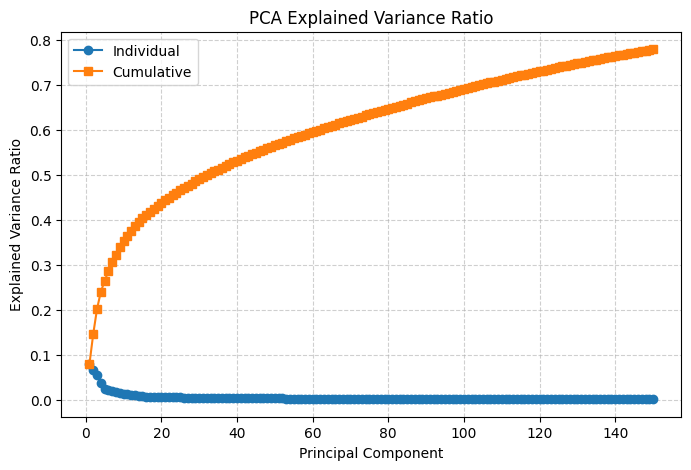

In [35]:
explained_variance_ratio = decomposer.explained_variance_ratio_

# Plot
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance_ratio)+1), explained_variance_ratio, marker='o', label="Individual")
plt.plot(range(1, len(explained_variance_ratio)+1), explained_variance_ratio.cumsum(), marker='s', label="Cumulative")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("PCA Explained Variance Ratio")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

In [36]:
df_seq_decompose=pd.DataFrame(decomposer.transform(df_seq_cleaned),columns=[f"PC{i}" for i in range(N)])

In [37]:
df_seq_decompose.shape

(1904, 150)

### 11. Kết hợp categorical + numerical lại thành bộ dữ liệu hoàn chỉnh đã xử lý

In [38]:
X,y=df_features.iloc[:,:-1],df_features.iloc[:,-1]

In [39]:
X=pd.concat([X,df_seq_decompose],axis=1)

In [40]:
X

,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,neoplasm_histologic_grade,her2_status,hormone_therapy,lymph_nodes_examined_positive,...,PC140,PC141,PC142,PC143,PC144,PC145,PC146,PC147,PC148,PC149
0,0,0,0,2,0,0,3.0,0,1,10.0,...,-0.347267,-0.288799,1.325277,2.291842,0.282392,0.365805,-2.091569,0.244239,0.464981,-0.320089
1,1,0,0,2,0,1,3.0,0,1,0.0,...,-0.363037,0.791735,0.136905,1.002374,1.997908,-1.875522,0.527915,-0.019373,1.223025,0.660181
2,0,0,0,2,1,2,2.0,0,1,1.0,...,-1.203419,-0.784513,-1.311643,0.434713,-0.625406,0.568053,-0.721542,0.132409,0.829732,1.477602
3,0,0,1,1,1,2,2.0,0,1,3.0,...,-0.206263,0.131775,2.672975,0.568907,-0.501339,-1.108942,-0.699877,-1.105266,0.704233,0.889255
4,0,0,1,2,1,2,3.0,0,1,8.0,...,1.068573,-0.559277,-1.144307,0.363854,0.117701,0.953203,0.750877,1.845008,0.390723,-0.298882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,1,0,2,2,0,1,3.0,0,1,1.0,...,0.088455,0.063923,-0.270807,1.002883,0.392744,-0.734837,0.111892,0.926068,-0.229299,-0.029217
1900,0,0,0,2,0,2,3.0,1,0,1.0,...,-0.860603,0.314601,0.473667,-0.449668,0.327069,0.217256,-0.789546,0.033705,0.074062,0.561807
1901,0,0,0,2,0,2,3.0,0,1,45.0,...,0.449562,-0.091051,0.140247,0.138949,0.943447,-0.633764,0.059728,0.171432,0.498610,-0.729563
1902,0,0,0,1,0,2,2.0,0,1,12.0,...,0.245186,-1.488934,-2.040219,0.513147,-0.136316,0.030207,0.627577,-0.255821,1.097351,0.201599
